# 데이터 탐색

In [166]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from scipy import sparse
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import root_mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import gc

In [167]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='AppleGothic'  #Mac용
#matplotlib.rcParam['font.family']='Malgun Gothic' 윈도우 용
matplotlib.rcParams['font.size']=15 #글자 크기
matplotlib.rcParams['axes.unicode_minus']=False #한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

In [168]:
df = pd.read_csv("movie_for_baseline.csv")
df

,영화제목,감독,제작사,수입사,유통사,영화형태,국적,총스크린수,매출금액,관람객,서울매출금액,서울관람객수,장르,등급,영화구분,개봉연도,개봉월
0,파묘,장재현,"(주)쇼박스,(주)엠씨엠씨",etc,(주)쇼박스,장편,한국,2355.0,1.057937e+11,10957317.0,2.481515e+10,2507635.0,미스터리,15세이상관람가,일반영화,2024,2
1,듄: 파트2,드니 빌뇌브,etc,워너브러더스 코리아(주),워너브러더스 코리아(주),장편,미국,1544.0,2.194099e+10,1886010.0,8.730581e+09,687149.0,액션,12세이상관람가,일반영화,2024,2
2,댓글부대,안국진,"(주)영화적순간,주식회사 디믹스스튜디오",etc,(주)에이스메이커무비웍스,장편,한국,1228.0,5.042399e+09,541058.0,1.309676e+09,134016.0,범죄,15세이상관람가,일반영화,2024,3
3,웡카,폴 킹,etc,워너브러더스 코리아(주),워너브러더스 코리아(주),장편,미국,1753.0,3.390668e+10,3526213.0,9.818367e+09,980128.0,판타지,전체관람가,일반영화,2024,1
4,고질라 X 콩: 뉴 엠파이어,아담 윈가드,etc,워너브러더스 코리아(주),워너브러더스 코리아(주),장편,미국,996.0,3.220813e+09,320982.0,7.506203e+08,69172.0,액션,12세이상관람가,일반영화,2024,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7059,D컵여자친구,이정석,스마일컨텐츠,etc,스마일컨텐츠,장편,한국,1.0,5.000000e+03,1.0,0.000000e+00,0.0,멜로/로맨스,청소년관람불가,일반영화,2020,11
7060,F컵 거유의 육덕녀,버드맨 텟페이,etc,(주)영진크리에이티브,(주)영진크리에이티브,장편,일본,1.0,6.000000e+03,1.0,0.000000e+00,0.0,멜로/로맨스,청소년관람불가,일반영화,2020,8
7061,F컵 거유의 육덕녀 무삭제판,버드맨 텟페이,etc,etc,(주)영진크리에이티브,장편,일본,1.0,6.000000e+03,1.0,0.000000e+00,0.0,멜로/로맨스,청소년관람불가,일반영화,2020,11
7062,G컵 베이글의 격렬한 플레이,etc,etc,(주)빅콘미디어,(주)빅콘미디어,장편,일본,1.0,6.000000e+03,1.0,0.000000e+00,0.0,성인물(에로),청소년관람불가,일반영화,2020,3


## 요약본

In [169]:
def resumtable(data):
    summary = pd.DataFrame(data.dtypes).reset_index().rename(columns={"index":"피처", 0:"dtypes"})
    summary["결측치 갯수"] = data.isnull().sum().values
    summary["고윳값 갯수"] = data.nunique().values
    summary["첫번째 값"] = data.iloc[0].values
    summary["두번째 값"] = data.iloc[1].values
    summary["세번째 값"] = data.iloc[2].values
    
    return summary

In [170]:
resumtable(df)

,피처,dtypes,결측치 갯수,고윳값 갯수,첫번째 값,두번째 값,세번째 값
0,영화제목,object,0,7050,파묘,듄: 파트2,댓글부대
1,감독,object,0,2453,장재현,드니 빌뇌브,안국진
2,제작사,object,0,764,"(주)쇼박스,(주)엠씨엠씨",etc,"(주)영화적순간,주식회사 디믹스스튜디오"
3,수입사,object,0,223,etc,워너브러더스 코리아(주),etc
4,유통사,object,0,541,(주)쇼박스,워너브러더스 코리아(주),(주)에이스메이커무비웍스
5,영화형태,object,0,4,장편,장편,장편
6,국적,object,0,56,한국,미국,한국
7,총스크린수,float64,0,595,2355.0,1544.0,1228.0
8,매출금액,float64,0,1316,105793676208.0,21940993462.0,5042399113.0
9,관람객,float64,0,1614,10957317.0,1886010.0,541058.0


In [171]:
df

,영화제목,감독,제작사,수입사,유통사,영화형태,국적,총스크린수,매출금액,관람객,서울매출금액,서울관람객수,장르,등급,영화구분,개봉연도,개봉월
0,파묘,장재현,"(주)쇼박스,(주)엠씨엠씨",etc,(주)쇼박스,장편,한국,2355.0,1.057937e+11,10957317.0,2.481515e+10,2507635.0,미스터리,15세이상관람가,일반영화,2024,2
1,듄: 파트2,드니 빌뇌브,etc,워너브러더스 코리아(주),워너브러더스 코리아(주),장편,미국,1544.0,2.194099e+10,1886010.0,8.730581e+09,687149.0,액션,12세이상관람가,일반영화,2024,2
2,댓글부대,안국진,"(주)영화적순간,주식회사 디믹스스튜디오",etc,(주)에이스메이커무비웍스,장편,한국,1228.0,5.042399e+09,541058.0,1.309676e+09,134016.0,범죄,15세이상관람가,일반영화,2024,3
3,웡카,폴 킹,etc,워너브러더스 코리아(주),워너브러더스 코리아(주),장편,미국,1753.0,3.390668e+10,3526213.0,9.818367e+09,980128.0,판타지,전체관람가,일반영화,2024,1
4,고질라 X 콩: 뉴 엠파이어,아담 윈가드,etc,워너브러더스 코리아(주),워너브러더스 코리아(주),장편,미국,996.0,3.220813e+09,320982.0,7.506203e+08,69172.0,액션,12세이상관람가,일반영화,2024,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7059,D컵여자친구,이정석,스마일컨텐츠,etc,스마일컨텐츠,장편,한국,1.0,5.000000e+03,1.0,0.000000e+00,0.0,멜로/로맨스,청소년관람불가,일반영화,2020,11
7060,F컵 거유의 육덕녀,버드맨 텟페이,etc,(주)영진크리에이티브,(주)영진크리에이티브,장편,일본,1.0,6.000000e+03,1.0,0.000000e+00,0.0,멜로/로맨스,청소년관람불가,일반영화,2020,8
7061,F컵 거유의 육덕녀 무삭제판,버드맨 텟페이,etc,etc,(주)영진크리에이티브,장편,일본,1.0,6.000000e+03,1.0,0.000000e+00,0.0,멜로/로맨스,청소년관람불가,일반영화,2020,11
7062,G컵 베이글의 격렬한 플레이,etc,etc,(주)빅콘미디어,(주)빅콘미디어,장편,일본,1.0,6.000000e+03,1.0,0.000000e+00,0.0,성인물(에로),청소년관람불가,일반영화,2020,3


# 데이터 분리
- 과거 영화 80프로의 데이터 > train
- 최근 영화 20프로의 데이터 > test

In [172]:
train = df.iloc[1400:]
test = df.iloc[:1400]

train.shape, test.shape

((5664, 17), (1400, 17))

- target값("관람객") 설정

In [173]:
train_target = train["관람객"]
train = train.drop(columns="관람객") # train 데이터에서 target값 제외

test_target = test["관람객"]
test = test.drop(columns="관람객")

train.shape, train_target.shape, test.shape, test_target.shape

((5664, 16), (5664,), (1400, 16), (1400,))

# 인코딩


In [175]:
# 영화제목 제외 인코딩 필요
train_ft = train.iloc[:,1:]
test_ft = test.iloc[:,1:]

train_ft.shape, test_ft.shape

((5664, 15), (1400, 15))

## count_encoding
- "감독, 제작사, 수입사, 유통사, 영화형태, 국적, 장르, 등급, 영화구분" 인코딩 필요
- onehot을 쓰면 피처가 너무 많이 생겨서 나중에 feature_importance 확인 불가
- 데이터타입이 "object"인 피처들을 보면 좋고 나쁜게 따로 없기 때문에 count_encoding채택

In [176]:
train_ft.select_dtypes("object").columns

Index(['감독', '제작사', '수입사', '유통사', '영화형태', '국적', '장르', '등급', '영화구분'], dtype='object')

### 감독

In [177]:
cnt_dict = train_ft["감독"].value_counts().to_dict()

train_ft["감독"] = train_ft["감독"].map(cnt_dict)
test_ft["감독"] = test_ft["감독"].map(cnt_dict)

del cnt_dict
gc.collect();

### 제작사

In [178]:
cnt_dict = train_ft["제작사"].value_counts().to_dict()

train_ft["제작사"] = train_ft["제작사"].map(cnt_dict)
test_ft["제작사"] = test_ft["제작사"].map(cnt_dict)

del cnt_dict
gc.collect();

### 수입사

In [179]:
cnt_dict = train_ft["수입사"].value_counts().to_dict()

train_ft["수입사"] = train_ft["수입사"].map(cnt_dict)
test_ft["수입사"] = test_ft["수입사"].map(cnt_dict)

del cnt_dict
gc.collect();

### 유통사

In [180]:
cnt_dict = train_ft["유통사"].value_counts().to_dict()

train_ft["유통사"] = train_ft["유통사"].map(cnt_dict)
test_ft["유통사"] = test_ft["유통사"].map(cnt_dict)

del cnt_dict
gc.collect();

### 영화형태

In [181]:
cnt_dict = train_ft["영화형태"].value_counts().to_dict()

train_ft["영화형태"] = train_ft["영화형태"].map(cnt_dict)
test_ft["영화형태"] = test_ft["영화형태"].map(cnt_dict)

del cnt_dict
gc.collect();

### 국적

In [182]:
cnt_dict = train_ft["국적"].value_counts().to_dict()

train_ft["국적"] = train_ft["국적"].map(cnt_dict)
test_ft["국적"] = test_ft["국적"].map(cnt_dict)

del cnt_dict
gc.collect();

### 장르

In [183]:
cnt_dict = train_ft["장르"].value_counts().to_dict()

train_ft["장르"] = train_ft["장르"].map(cnt_dict)
test_ft["장르"] = test_ft["장르"].map(cnt_dict)

del cnt_dict
gc.collect();

### 등급

In [184]:
cnt_dict = train_ft["등급"].value_counts().to_dict()

train_ft["등급"] = train_ft["등급"].map(cnt_dict)
test_ft["등급"] = test_ft["등급"].map(cnt_dict)

del cnt_dict
gc.collect();

### 영화구분

In [185]:
cnt_dict = train_ft["영화구분"].value_counts().to_dict()

train_ft["영화구분"] = train_ft["영화구분"].map(cnt_dict)
test_ft["영화구분"] = test_ft["영화구분"].map(cnt_dict)

del cnt_dict
gc.collect();

In [186]:
print(train_ft.select_dtypes("object"))
print(test_ft.select_dtypes("object"))

Empty DataFrame
Columns: []
Index: [1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, ...]

[5664 rows x 0 columns]
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 

In [218]:
train_ft.isnull().sum().sum(), test_ft.isnull().sum().sum() # test_ft에 있는 데이터가 train_ft에 없는경우 결측치 생김

(0, 1057)

In [221]:
test_ft = test_ft.fillna(0) # train_ft에 데이터가 없으므로 counter_encoding에 대한 결과가 0

In [222]:
train_ft.isnull().sum().sum(), test_ft.isnull().sum().sum()

(0, 0)

## 원핫 인코딩

In [155]:
# cols = train_ft.select_dtypes("object").columns # 피쳐중 데이터 타입이 "object"만 추출
# onehot_enc = OneHotEncoder(handle_unknown="ignore")
# train_encoded = onehot_enc.fit_transform(train_ft[cols]) # 데이터 타입 "object"만 원핫 인코딩
# test_encoded = onehot_enc.transform(test_ft[cols])
# train_ft = train_ft.drop(columns=cols) # train_ft에서 원핫인코딩으로 진행된 피처들 제거
# test_ft = test_ft.drop(columns=cols)

# # train_ft와 train_encoded 결합
# train_sprs = sparse.hstack([sparse.csr_matrix(train_ft),
#                                train_encoded],
#                                format="csr")

# test_sprs = sparse.hstack([sparse.csr_matrix(test_ft),
#                                test_encoded],
#                                format="csr")

In [156]:
# sparse.hstack([sparse.csr_matrix(train_ft),
#                train_encoded],
#               format="csr")

In [157]:
# train_sprs.shape, test_sprs.shape

# 모델링

In [224]:
# feature_importance를 확인하기 위해 트리기반 모델 테스트
rf_model = RandomForestRegressor(random_state=42)
lgbm_model = LGBMRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
hgb_model = HistGradientBoostingRegressor(random_state=42)

In [225]:
# rf_model_cross_val_score 점수 확인
scores = cross_val_score(rf_model, train_ft, train_target, scoring="neg_root_mean_squared_error", cv=KFold(n_splits=5, shuffle=True, random_state=42))
-scores.mean()

26532.785030467065

In [226]:
# lgbm_model_cross_val_score 점수 확인
scores = cross_val_score(lgbm_model, train_ft, train_target, scoring="neg_root_mean_squared_error", cv=KFold(n_splits=5, shuffle=True, random_state=42))
-scores.mean()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1270
[LightGBM] [Info] Number of data points in the train set: 4531, number of used features: 14
[LightGBM] [Info] Start training from score 13174.121607
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1270
[LightGBM] [Info] Number of data points in the train set: 4531, number of used features: 14
[LightGBM] [Info] Start training from score 13366.217833
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not

66252.60944739109

In [227]:
# gb_model_cross_val_score 점수 확인
scores = cross_val_score(gb_model, train_ft, train_target, scoring="neg_root_mean_squared_error", cv=KFold(n_splits=5, shuffle=True, random_state=42))
-scores.mean()

24134.16753922617

In [228]:
# hgb_model_cross_val_score 점수 확인
scores = cross_val_score(hgb_model, train_ft, train_target, scoring="neg_root_mean_squared_error", cv=KFold(n_splits=5, shuffle=True, random_state=42))
-scores.mean()

87218.69028031713

# 최종 점수

- rf_model score

In [229]:
rf_model.fit(train_ft, train_target)
pred = rf_model.predict(test_ft)
root_mean_squared_error(test_target, pred)

299843.4630620125

- lgbm_model score

In [164]:
lgbm_model.fit(train_ft, train_target)
pred = lgbm_model.predict(test_ft)
root_mean_squared_error(test_target, pred)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1270
[LightGBM] [Info] Number of data points in the train set: 5664, number of used features: 14
[LightGBM] [Info] Start training from score 12623.804379


376682.6683953312

- gb_model score

In [233]:
gb_model.fit(train_ft, train_target)
pred = gb_model.predict(test_ft)
root_mean_squared_error(test_target, pred)

291978.6681389068

- hgb_model score

In [234]:
hgb_model.fit(train_ft, train_target)
pred = hgb_model.predict(test_ft)
root_mean_squared_error(test_target, pred)

383579.9603223585

# feature_importances

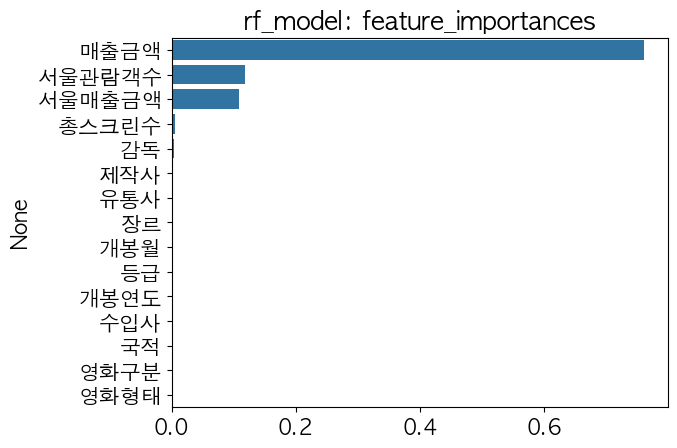

In [95]:
arg_idx = np.argsort(rf_model.feature_importances_)[::-1]

sns.barplot(x = rf_model.feature_importances_[arg_idx], y = train_ft.columns[arg_idx])
plt.title("rf_model: feature_importances")
plt.show()

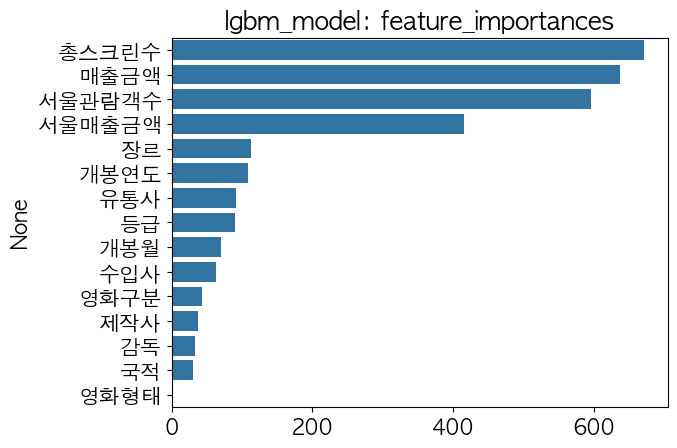

In [97]:
arg_idx = np.argsort(lgbm_model.feature_importances_)[::-1]

sns.barplot(x = lgbm_model.feature_importances_[arg_idx], y = train_ft.columns[arg_idx])
plt.title("lgbm_model: feature_importances")
plt.show()

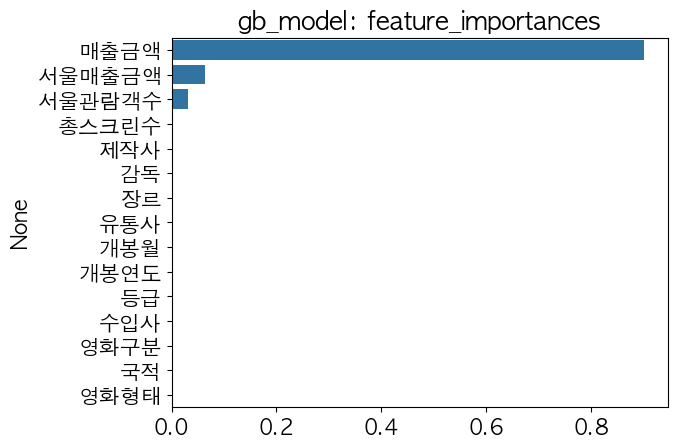

In [236]:
arg_idx = np.argsort(gb_model.feature_importances_)[::-1]

sns.barplot(x = gb_model.feature_importances_[arg_idx], y = train_ft.columns[arg_idx])
plt.title("gb_model: feature_importances")
plt.show()

# 정리하기
- 데이터의 최신 20%를 test 데이터로, 나머진 train 데이터
- 인코딩: 전부 count_encoding
- 스케일링: X
- 모델링: RandomForestRegressor, GradientBoostingRegressor 점수가 잘나옴
    - RandomForestRegressor
        - cross_val_score: 26532
        - final_score: 299843
    - LGBMRegressor
        - cross_val_score: 66252
        - final_score: 376682
    - GradientBoostingRegressor
        - cross_val_score: 24134
        - final_score: 291978
    - HistGradientBoostingRegressor
        - cross_val_score: 87218
        - final_score: 383579
- feature_importances
    - RandomForestRegressor
        - 매출금액, 서울관람객수, 서울매출금액 을 제외하고 거의 영향 X (매출금액 압도적)
    - LGBMRegressor
        - 총스크린수, 매출금액, 서울관람객수, 서울매출금액 < 영향 많이 끼침
        - 그외에도 자잘하게 영향을 전부 조금씩은 미침
    - GradientBoostingRegressor
        - 매출금액, 서울관람객수, 서울매출금액 을 제외하고 거의 영향 X (매출금액 압도적)
    - 영화형태: 두 모델전부 영향을 거의 끼치지 않음